<h1 style='color: green; font-size: 36px; font-weight: bold;'>Feature Selection ⚙</h1>

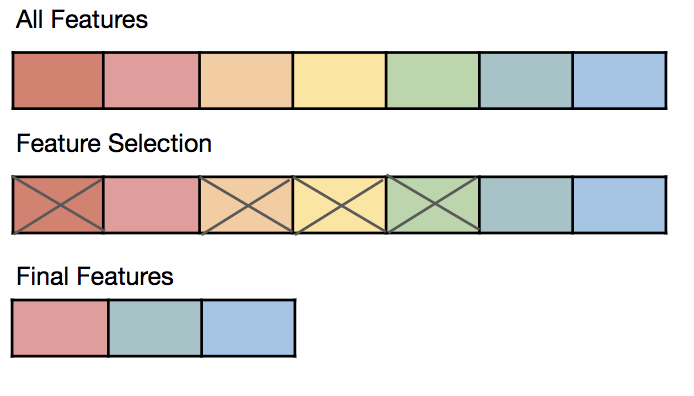

<h1 style='color: red; font-size: 30px; font-weight: bold;'>Introdução 📖 </h1>

👉 O objetivo é demonstrar as diversas técnicas de Feature Selection e testar quais datasets performaram melhor em um modelo de classificação de teste

👉 As técnicas vão desde: Métodos de filtragem, estatísticos, Wrapper, Embedded e Hybrids.

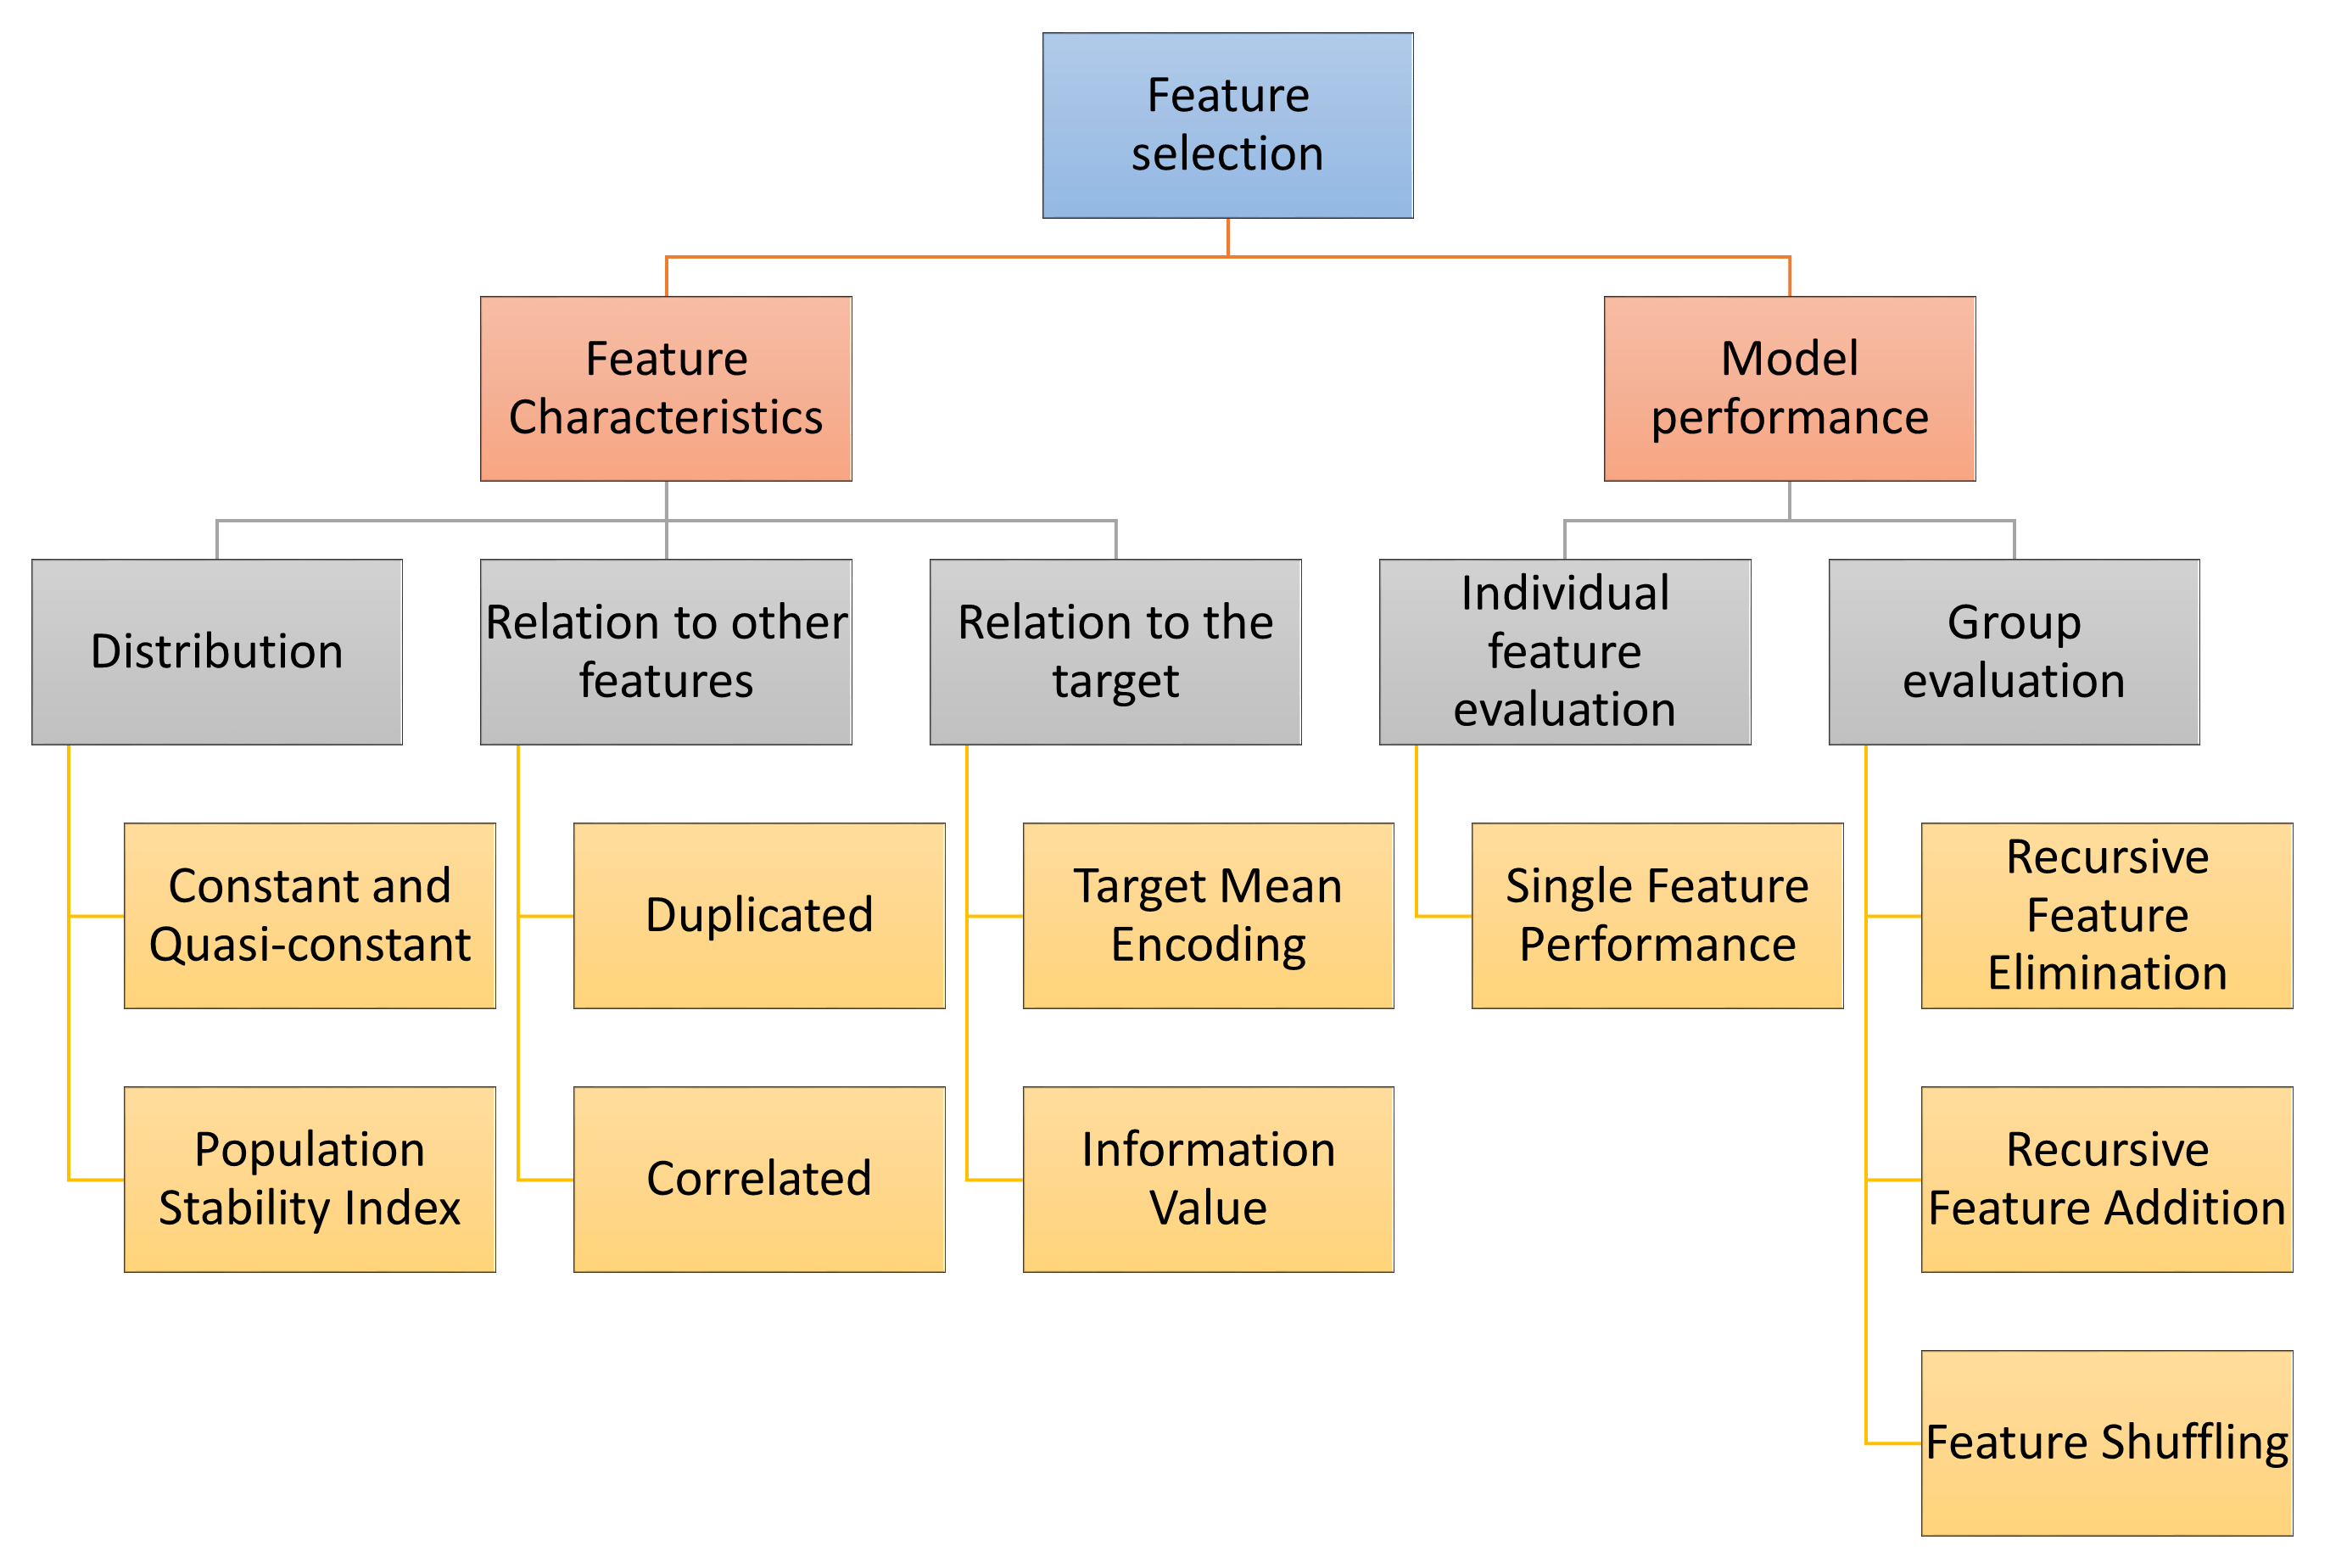

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>1) Importando as Bibliotecas 💻</h1>

In [80]:
#Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#feature_engine.selection - métodos
from feature_engine.selection import DropConstantFeatures #Constante features
from feature_engine.selection import DropDuplicateFeatures #Duplicated features
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection #Correlation
from sklearn.feature_selection import mutual_info_classif #mutual information
from sklearn.feature_selection import f_classif #ANOVA
from sklearn.feature_selection import SelectKBest, SelectPercentile #SelectKBest e SelectPercentile
from feature_engine.selection import SelectBySingleFeaturePerformance #seleção de 1 feature por performance
from sklearn.feature_selection import SequentialFeatureSelector #Step Foward and Backward Feature Selection (4.1 e 4.2)
from feature_engine.selection import SelectByShuffling #Shuffling Selection
from feature_engine.selection import RecursiveFeatureElimination #recursive feature elimination (6.2)

#mlxtend 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS #Step Foward and Backward Feature Selection (4.1 e 4.2)
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS #Exaustic features selection (4.3)

#SKLearn utilidades
from sklearn.pipeline import Pipeline #Pipeline
from sklearn.model_selection import train_test_split #divisão em treino e teste
from sklearn.preprocessing import StandardScaler #escalonamento de dados padrão
from sklearn.metrics import roc_auc_score #métrica roc_auc
from sklearn.feature_selection import SelectFromModel #Seleção de features por modelo

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>2) Leitura do dataset 📂</h1>

In [2]:
data1 = pd.read_csv('dataset_1.csv')
data1.shape

(50000, 301)

In [3]:
data2 = pd.read_csv('dataset_2.csv')
data2.shape

(50000, 109)

In [28]:
data1.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [8]:
data2.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,17.982476,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417
1,5.821374,12.098722,13.309151,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,0.567939,1.018818,1.416433
2,1.938776,7.952752,0.972671,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183,1.575493,1.857893
3,6.020690,9.900544,17.869637,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482,0.946170,2.700606
4,3.909506,10.576516,0.934191,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,0.511027,2.599562,0.811364


* ####  Divisão em treino e teste dos datasets

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(labels=['target'], axis=1), # drop the target
    data1['target'], # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>3) Filter Methods ⚙</h1>

👉 É bem utilizado para realizar uma rápida remoção de features fracas e irrelevantes, porém não é um método robusto.

👉 Esse método é útil para se utilizar como uma primeira avaliação, de forma que ele é eficiente em remover features correlacionadas, duplicadas ou constantes de forma rápida, e com pouco poder computacional gasto.

👉 Recomendado para remover features constantes, quasi-constantes, duplicadas e correlacionadas.

### 3.1) Constant Features & Quasi-constant Features

https://feature-engine.trainindata.com/en/latest/user_guide/selection/DropConstantFeatures.html

👉 Remoção de features constantes ou quasi-constantes, ou seja, que em grande parte repetem valores.

👉 Features constantes repetem o valor em 100% das linhas e quasi pelo menos em 98%, ou seja, variância próxima de zero, ou zero.

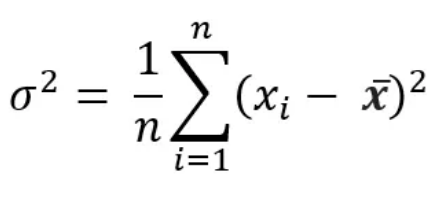

In [30]:
sel = DropConstantFeatures(tol=1, #100% dos valores iguais (constant)
                           variables=None, #olhar todas do dataset
                           missing_values='raise'
                          )

sel.fit(X_train)

DropConstantFeatures()

👉 Aplicando o `DropConstantFeatures` para remover as features constantes

In [14]:
features_to_drop = sel.features_to_drop_
len(features_to_drop)

34

34 features constantes foram encontradas para serem removidas

👉 Vamos analisar uma delas:

In [15]:
sel.features_to_drop_[0]

'var_23'

In [16]:
data1['var_23'].unique()

array([0], dtype=int64)

todos os valores são iguais a 0 (100%)

👉 Removendo as features constantes:

In [31]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 266), (15000, 266))

Agora vamos remover as quasi-constants com tolerância de 98%, ou seja, 98% dos valores são constantes

In [32]:
sel = DropConstantFeatures(tol=0.998, #98% de tolerância
                           variables=None, 
                           missing_values='raise')

sel.fit(X_train)

DropConstantFeatures(tol=0.998)

In [33]:
features_to_drop = sel.features_to_drop_
len(features_to_drop)

108

108 features quasi constants foram encontradas

In [20]:
sel.features_to_drop_[0]

'var_1'

In [24]:
(data1['var_1'].value_counts(normalize=True))*100

var_1
0    99.950
3     0.030
6     0.016
9     0.004
Name: proportion, dtype: float64

99% dos valores são iguais a 0

👉 Removendo as features quasi-constantes:

In [34]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 158), (15000, 158))

### 3.2) Duplicated Features

https://feature-engine.trainindata.com/en/latest/user_guide/selection/DropDuplicateFeatures.html

👉 Remoção de Features Duplicadas, ou seja, iguais à outras existentes

In [35]:
sel = DropDuplicateFeatures(variables=None, 
                            missing_values='raise')

sel.fit(X_train)

DropDuplicateFeatures(missing_values='raise')

In [36]:
sel.duplicated_feature_sets_

[{'var_148', 'var_37'},
 {'var_199', 'var_84'},
 {'var_143', 'var_296'},
 {'var_177', 'var_250'},
 {'var_226', 'var_232'},
 {'var_229', 'var_269'}]

In [37]:
sel.features_to_drop_

{'var_148', 'var_199', 'var_232', 'var_250', 'var_269', 'var_296'}

In [38]:
len(sel.features_to_drop_)

6

6 features duplicadas serão removidas

In [39]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 152), (15000, 152))

### 3.3) Pipeline Constant & Quasi-constant e Duplicated

In [40]:
data1 = pd.read_csv('dataset_1.csv')
data1.shape

(50000, 301)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(labels=['target'], axis=1), # drop the target
    data1['target'], # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [44]:
pipe = Pipeline(
[
    ('constant', DropConstantFeatures(tol=0.998)), #Para remover constants e quasi-constants
    ('duplicated', DropDuplicateFeatures()), #duplicadas
])

pipe.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures())])

In [45]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train.shape, X_test.shape

((35000, 152), (15000, 152))

### 3.4) Correlation

https://feature-engine.trainindata.com/en/latest/user_guide/selection/DropCorrelatedFeatures.html

👉 Correlação é uma medida da relação linear entre 2 ou mais variáveis. Quanto maior a correlação, tanto de forma positiva, ou negativa, indica que estão altamente correlacionadas, e quanto mais próxima de zero essa relação, mais indica que não estão.

👉 Boas Features possuem alta correlação com o Target (particularmente para modelos lineares), e features que possuem alta correlação com outras provocam informações redundantes

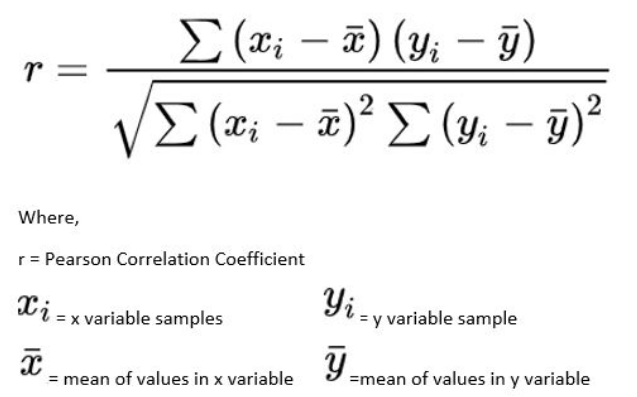

👉 Há 2 métodos utilizados:

1) Brute force approach: Analisa a correlação de todas as features e elimina todas as correlacionadas. É ruim pois pode acabar removendo uma mais importante

2) Agrupamento: Separa as features correlacionadas e agrupa, e depois seleciona por feature importance cada uma de cada grupo

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1), # drop the target
    data2['target'], # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

* #### Brute Force approach

In [49]:
sel = DropCorrelatedFeatures(
    threshold=0.8, #Remover aquelas com correlação >0.8
    method='pearson', #método pearson
    missing_values='ignore' #ignorar valores nulos
)

sel.fit(X_train)

DropCorrelatedFeatures()

In [50]:
len(sel.correlated_feature_sets_)

23

In [51]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 74), (15000, 74))

Foram removidas 23 features correlacionadas

👉 Vamos investigar um par delas:

In [52]:
sel.correlated_feature_sets_[0]

{'var_3', 'var_80'}

In [55]:
data_corr = data2[['var_3','var_80']]

In [57]:
data_corr.corr(method='pearson')

,var_3,var_80
var_3,1.000000,-0.994772
var_80,-0.994772,1.000000


👉 Ambas estão altamente correlacionadas de forma negativa (-0.994772). Ambas as variáveis foram removidas, porém uma delas poderia vir a ser importante para o modelo.

* #### Agrupamento

https://feature-engine.trainindata.com/en/latest/user_guide/selection/SmartCorrelatedSelection.html

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1), # drop the target
    data2['target'], # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [59]:
sel = SmartCorrelatedSelection(
    variables=None, #olhar todas
    method="pearson", #método pearson
    threshold=0.8, #0.8 de correlação
    missing_values="raise", 
    selection_method="variance", #pode ser por variância ou feature importance de um modelo criado para isso
    estimator=None,
    scoring="roc_auc", #avaliar as features do grupo por roc_auc
    cv=3,
)

sel.fit(X_train, y_train)

SmartCorrelatedSelection(missing_values='raise', selection_method='variance')

In [61]:
group = sel.correlated_feature_sets_[1]
group

{'var_28', 'var_5', 'var_75'}

In [66]:
print('var_28' in sel.features_to_drop_)
print('var_5' in sel.features_to_drop_)
print('var_75' in sel.features_to_drop_)

True
True
False


Desse grupo de features correlacionadas, a `var_28` e `var_5` serão removidas e a `var_75` irá permanecer.

### 3.5) Pipeline Constant & Quasi-constant, Duplicated e Correlation

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(labels=['target'], axis=1),
    data1['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [71]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), #98% de valores iguais
    ('duplicated', DropDuplicateFeatures()), #remover duplicados
    ('correlation', SmartCorrelatedSelection(selection_method='variance')), #correlação por variância
])

pipe.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures()),
                ('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [72]:
X_train_corr = pipe.transform(X_train)
X_test_corr = pipe.transform(X_test)

X_train_corr.shape, X_test_corr.shape

((35000, 78), (15000, 78))

👉 Testando a performance do modelo com dataset original e com as features removidas:

In [73]:
def run_logistic(X_train, X_test, y_train, y_test):
    
    # function to train and test the performance of logistic regression
    logit = LogisticRegression(random_state=44, max_iter=500)
    logit.fit(X_train, y_train)
    print('Train set')
    pred = logit.predict_proba(X_train)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    print('Test set')
    pred = logit.predict_proba(X_test)
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

* #### Original

In [81]:
scaler = StandardScaler().fit(X_train)

run_logistic(scaler.transform(X_train),
             scaler.transform(X_test),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8028234997219593
Test set
Logistic Regression roc-auc: 0.7950984398269425


* #### Feature Selection

In [82]:
scaler = StandardScaler().fit(X_train_corr)

run_logistic(scaler.transform(X_train_corr),
             scaler.transform(X_test_corr),
                  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7919614580048029
Test set
Logistic Regression roc-auc: 0.7886056783404122


👉 Podemos observar que os resultados do modelo com o dataset original e com o dataset com features removidas performou com valores de auc muito próximo

### 3.6) Statistical Test - Mutual Information (M.I)

👉 Mutual Information ou Informação mútua, é a medida da dependência mutual de 2 variáveis aleatórias. Em outras palavras, serve para quantificar o ganho de informação de uma variável aleatória sobre a observação de outra variável aleatória.

👉 Primeiro calcula o M.I, depois rankeia as melhores features baseado em um Threshold

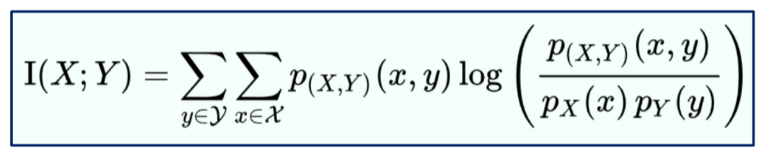

In [95]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1), # drop the target
    data2['target'], # just the target
    test_size=0.3,
    random_state=0)

# Cálculo do mi
mi = mutual_info_classif(X_train, y_train)

# select features - k=30 (as 30 melhores)
sel_ = SelectKBest(mutual_info_classif, k=30).fit(X_train, y_train)

# Removendo as features do mi
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [98]:
X_train.columns[sel_.get_support()]

Index(['var_2', 'var_6', 'var_7', 'var_8', 'var_14', 'var_16', 'var_21',
       'var_33', 'var_34', 'var_44', 'var_45', 'var_48', 'var_52', 'var_54',
       'var_55', 'var_57', 'var_60', 'var_66', 'var_69', 'var_73', 'var_74',
       'var_78', 'var_80', 'var_86', 'var_90', 'var_96', 'var_98', 'var_100',
       'var_102', 'var_108'],
      dtype='object')

### 3.7) Statistical Test - ANOVA 

👉 É um teste estatístico altamente usado que testa a hipótese de que 2 ou mais amostras de um dataset possuem a mesma média, considerando que as amostras são:

* Independentes
* Normalmente distribuídas
* Homogeneidade de variância


In [101]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1), # drop the target
    data2['target'], # just the target
    test_size=0.3,
    random_state=0)

# Cálculo do mi
univariate = f_classif(X_train, y_train)

# select features - k=15 (as 15 melhores)
sel_ = SelectKBest(f_classif, k=15).fit(X_train, y_train)

# Removendo as features do mi
X_train = sel_.transform(X_train)
X_test = sel_.transform(X_test)

In [104]:
X_train.columns[sel_.get_support()]

Index(['var_13', 'var_16', 'var_17', 'var_21', 'var_26', 'var_30', 'var_34',
       'var_48', 'var_55', 'var_69', 'var_70', 'var_84', 'var_91', 'var_96',
       'var_108'],
      dtype='object')

### 3.8) Utilizando um modelo de ML para cada feature

Cria um modelo para cada feature, as que tiverem valor de roc_auc acima de um dado threshold irão para o modelo final 
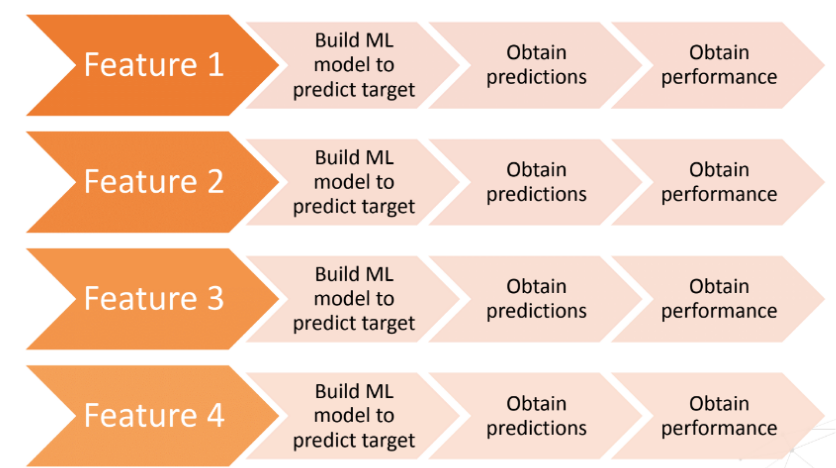
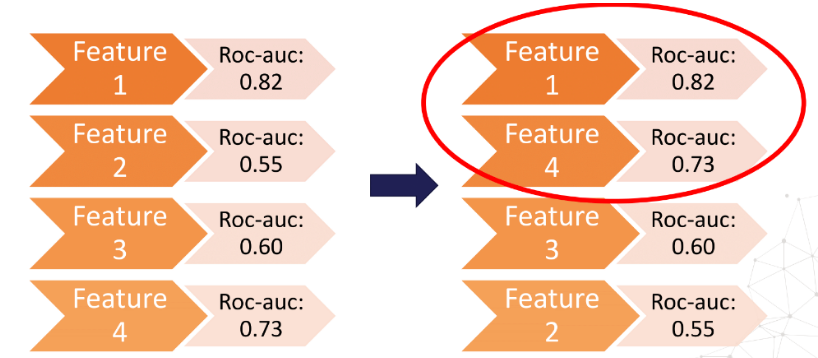

In [108]:
# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1), # drop the target
    data2['target'], # just the target
    test_size=0.3,
    random_state=0)

# cria um modelo de ml
rf = RandomForestClassifier(
    n_estimators=10, random_state=1, n_jobs=4)

# Cria o seletor
sel = SelectBySingleFeaturePerformance(
    variables=None, #olhar por todas
    estimator=rf, #modelo
    scoring="roc_auc", #score avaliado
    cv=3, 
    threshold=0.5, #features com valores acima de 0.5 de roc_auc entram no modelo final
)

# encontra as features acima do threshold
sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=RandomForestClassifier(n_estimators=10,
                                                                  n_jobs=4,
                                                                  random_state=1),
                                 threshold=0.5)

Text(0, 0.5, 'roc-auc')

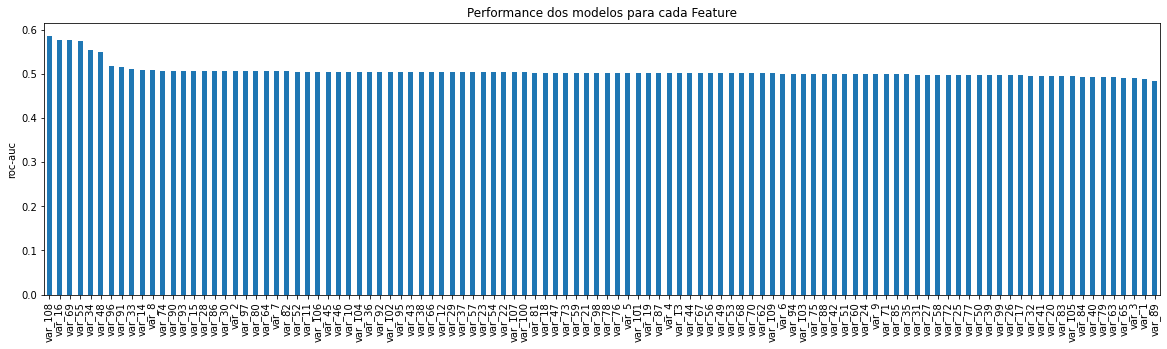

In [114]:
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance dos modelos para cada Feature')
plt.ylabel('roc-auc')

In [110]:
len(sel.features_to_drop_)

36

In [111]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 72), (15000, 72))

36 features foram removidas!

<h1 style='color: blue; font-size: 30px; font-weight: bold;'>4) Wrapper Methods ⚙</h1>

👉 Usa algoritmos de Machine Learning para realizar a seleção de features e score do subset, treinando um novo modelo para feature subset de dados.

👉 Tem alto poder computacional, e é o que apresenta melhor performance no feature subset para cada algoritmo de ML.

👉 Irá procurar um subset de de features, depois construirá um modelo de ML com esse subset de features, vai avaliar a performance do modelo e repetirá novamente os passos anteriores até encontrar o subset perfeito para o modelo.

### 4.1) Step Forward Feature Selection

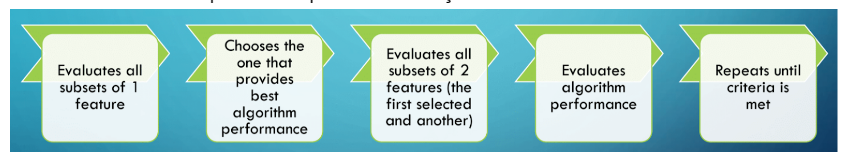

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html

👉 Se o dataset original possui n features, então teremos n datasets, cada um com uma única features. 

👉 O modelo será treinado e vai avaliar o resultado do dataset, onde os melhores serão mantidos e os piores descartados.

👉 Irá construir outros datasets com n+1 features, depois n+2, até chegar em um número ideal de features.

👉 O ideal é parar de adicionar feature quando a performance do modelo não aumenta mais a partir de um certo threshold.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

⛔ Removendo as features correlacionadas para evitar criação de datasets iguais e acabar removendo uma importante

In [6]:
pipe = Pipeline([
    ('correlation', SmartCorrelatedSelection(selection_method='variance')), #correlação por variância
])

pipe.fit(X_train)

Pipeline(steps=[('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [7]:
X_train_corr = pipe.transform(X_train)
X_test_corr = pipe.transform(X_test)

X_train_corr.shape, X_test_corr.shape

((35000, 74), (15000, 74))

* #### Método mlxtend

In [14]:
sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0), #modelo de RF
           k_features=10, #número de features
           forward=True, #tipo de busca (1 à n)
           floating=False, 
           verbose=2, #a cada quantos passos irá printar
           scoring='roc_auc', #score
           cv=2, #cross-validation
         )

sfs = sfs.fit(X_train_corr, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:   42.6s finished

[2024-01-08 19:32:48] Features: 1/10 -- score: 0.5801164755913063[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:   30.0s finished

[2024-01-08 19:33:18] Features: 2/10 -- score: 0.6164506976657189[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   33.3s finished

[2024-01-08 19:33:51] Features: 3/10 -- score: 0.6466128088147065[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

* #### Método SKLearn

features escolhidas:

In [15]:
selected_feat = X_train.columns[list(sfs.k_feature_idx_)]

selected_feat

Index(['var_13', 'var_28', 'var_37', 'var_53', 'var_58', 'var_59', 'var_62',
       'var_68', 'var_71', 'var_75'],
      dtype='object')

### 4.2) Step backward Feature Selection

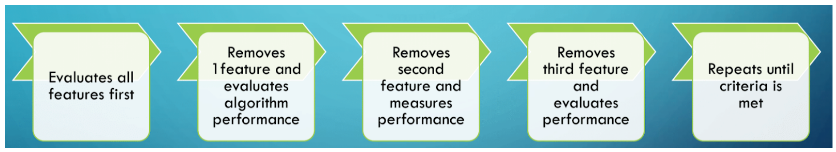

👉 Mesma ideia porém agora o procedimento será ao contrário. Começa em n features e vai reduzindo até achar o número ideal.

👉 O ideal é remover features sem que a performance abaixe a partir de um certo threshold definido

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [17]:
pipe = Pipeline([
    ('correlation', SmartCorrelatedSelection(selection_method='variance')), #correlação por variância
])

pipe.fit(X_train)

Pipeline(steps=[('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [18]:
X_train_corr = pipe.transform(X_train)
X_test_corr = pipe.transform(X_test)

X_train_corr.shape, X_test_corr.shape

((35000, 74), (15000, 74))

In [19]:
sfs = SFS(RandomForestClassifier(n_estimators=10, n_jobs=4, random_state=0), #modelo de RF
           k_features=70, #número de features. Se atentar pois agora é o contrário. Quanto menor, mais tempo
           forward=False, #tipo de busca (n até o numero ideal)
           floating=False, 
           verbose=2, #a cada quantos passos irá printar
           scoring='roc_auc', #score
           cv=2, #cross-validation
         )

sfs = sfs.fit(X_train_corr, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  74 out of  74 | elapsed:  3.2min finished

[2024-01-08 19:44:27] Features: 73/70 -- score: 0.6278647358165212[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  73 out of  73 | elapsed:  3.0min finished

[2024-01-08 19:47:30] Features: 72/70 -- score: 0.6327925207804526[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  2.9min finished

[2024-01-08 19:50:26] Features: 71/70 -- score: 0.6279825078673118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [20]:
selected_feat = X_train.columns[list(sfs.k_feature_idx_)]

selected_feat

Index(['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8',
       'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_15', 'var_16',
       'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23',
       'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30',
       'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37',
       'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_45',
       'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52',
       'var_53', 'var_54', 'var_55', 'var_56', 'var_58', 'var_59', 'var_60',
       'var_62', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69',
       'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75'],
      dtype='object')

In [21]:
len(selected_feat)

70

👉 70 features foram mantidas

### 4.3) Exaustive Feature Search

👉 Procura por todas as combinações possíveis de Features existentes no dataset, varrendo de 1 à n features, e testando todas as combinações possíveis até encontrar o dataset com a métrica de melhor score.

👉 Dependendo do tamanho do dataset, esse tipo de método é basicamente impossível de ser realizado devido a tamanho poderio computacional necessário.

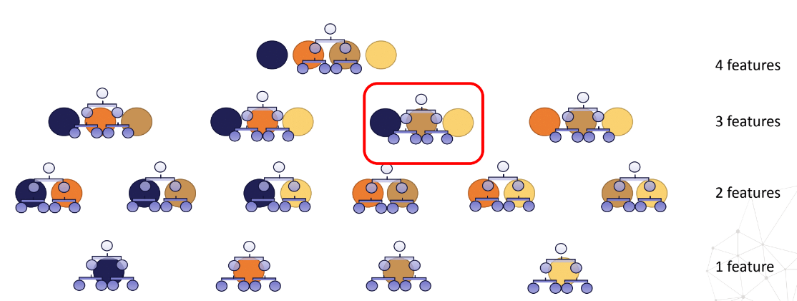

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

In [24]:
pipe = Pipeline([
    ('correlation', SmartCorrelatedSelection(selection_method='variance')), #correlação por variância
])

pipe.fit(X_train)

Pipeline(steps=[('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [25]:
X_train_corr = pipe.transform(X_train)
X_test_corr = pipe.transform(X_test)

X_train_corr.shape, X_test_corr.shape

((35000, 74), (15000, 74))

In [26]:
efs = EFS(RandomForestClassifier(n_estimators=5,n_jobs=4,random_state=0,max_depth=2), #modelo de RF
          min_features=1, #Possibilidade mínima de combinação
          max_features=2, #Possobilidade máxima de combinação
          scoring='roc_auc', #score
          print_progress=True,
          cv=2)

# search features
efs = efs.fit(X_train, y_train)

Features: 5886/5886

In [27]:
selected_feat = X_train.columns[list(efs.best_idx_)]
selected_feat

Index(['var_16', 'var_55'], dtype='object')

### 5) Embedded Methods

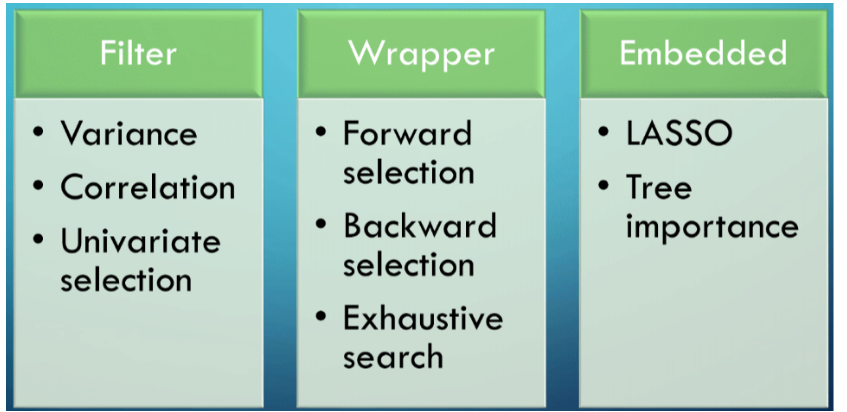

👉 Realiza Feature Selection como parte do processo de construção do modelo, considerando a interação da Feature com o modelo.

👉 Ele é menos pesado que o Wrapper Method, pois ele constrói um único modelo de ML e seleciona as features baseada na importância do algoritmo.

👉 Este método é mais leve que o Wrapper, é mais preciso que o Filter, detecta interação entre as variáveis e acha o subset ideal para o modelo escolhido no treinamento

👉 Ele treina o modelo com todas as variáveis, deriva a importância dessas features e remove as que não são importantes usando alguns critérios como regressão LASSO, Importance Tree ou coeficientes de regressão.

### 5.1) Lasso Regularization

👉 Usa o conceito de Regressão Linear para a Feature Selection.

👉 O modelo conta que as variáveis X são independentes entre si, não correlacionadas, devem estar na mesma escala (uma vez que afetam a magnitude dos coeficientes, sendo importante aplicar uma normalização), e possuem uma relação linear com Y.

👉 Vale lembrar que a regularização penaliza os coeficientes das piores features de forma que reduz sua influência na criação de um modelo mais generalizado.

👉 A regressão LASSO encolhe os valores dos coeficientes menos importantes para o valor de zero, removendo assim as features que são menos importantes para a construção do modelo (por este motivo não utiliza-se a regressão ridge).

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    data1.drop(labels=['target'], axis=1),
    data1['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [50]:
X_train_original = X_train.copy()
X_test_original = X_test.copy()

* ####  Removendo features constantes

In [51]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), #98% de valores iguais
    ('duplicated', DropDuplicateFeatures()), #remover duplicados
])

pipe.fit(X_train)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures())])

In [52]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train.shape, X_test.shape

((35000, 152), (15000, 152))

* #### Removendo as correlacionadas

In [59]:
pipe = Pipeline([
    ('correlation', SmartCorrelatedSelection(selection_method='variance')), #correlação por variância
])

pipe.fit(X_train)

Pipeline(steps=[('correlation',
                 SmartCorrelatedSelection(selection_method='variance'))])

In [60]:
X_train_corr = pipe.transform(X_train)
X_test_corr = pipe.transform(X_test)

X_train_corr.shape, X_test_corr.shape

((35000, 78), (15000, 78))

* #### Removendo features por regularização l2

#### ⛔ Deve-se aplicar o escalonamento padrão dos dados para evitar penalizações altas para features desbalanceadas

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [54]:
sel_ = SelectFromModel(LogisticRegression(C=0.0005, random_state=10, max_iter=1000, penalty='l2'))

sel_.fit(scaler.transform(X_train), y_train)

SelectFromModel(estimator=LogisticRegression(C=0.0005, max_iter=1000,
                                             random_state=10))

📃 OBS: Quanto maior o C menor a penalização de regressão l2 nos coeficientes de cada variável.

In [55]:
X_train_coef = pd.DataFrame(sel_.transform(X_train))
X_test_coef = pd.DataFrame(sel_.transform(X_test))

# add the columns name
X_train_coef.columns = X_train.columns[(sel_.get_support())]
X_test_coef.columns = X_train.columns[(sel_.get_support())]

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [56]:
X_train_coef.shape, X_test_coef.shape

((35000, 36), (15000, 36))

* #### Comparando resultados

In [57]:
def run_logistic(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler().fit(X_train)
    
    logit = LogisticRegression(C=0.0005, random_state=10, max_iter=10000, penalty='l2')
    logit.fit(scaler.transform(X_train), y_train)
    
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

* #### dataset original

In [58]:
run_logistic(X_train_original,
             X_test_original,
             y_train,
             y_test)

Train set
Logistic Regression roc-auc: 0.7844213790053062
Test set
Logistic Regression roc-auc: 0.7825685631204591


* #### Sem features constantes

In [61]:
run_logistic(X_train,
             X_test,
             y_train,
             y_test)

Train set
Logistic Regression roc-auc: 0.7828399366247254
Test set
Logistic Regression roc-auc: 0.78157678928197


* #### Sem correlacionadas

In [62]:
run_logistic(X_train_corr,
             X_test_corr,
             y_train,
             y_test)

Train set
Logistic Regression roc-auc: 0.7777028209363192
Test set
Logistic Regression roc-auc: 0.7747206185304815


* #### Filtradas pelo l2

In [63]:
run_logistic(X_train_coef,
             X_test_coef,
             y_train,
             y_test)

Train set
Logistic Regression roc-auc: 0.779995856192144
Test set
Logistic Regression roc-auc: 0.7780314860500013


### 5.2) Trees Methods

👉 cria-se um modelo de RandomForest, determina a importância das features do dataset e seleciona as features com maior importância

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

#### Cria o modelo de RF

In [65]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

In [66]:
selected_feat = X_train.columns[(sel_.get_support())]

len(selected_feat)

27

27 features foram selecionadas por feature importance

### 6) Hybrid Feature Selection Methods

Os métodos híbridos consistem em aplicar técnicas tanto do Wrapper methods quanto dos Embedded methods

### 6.1) Feature Shuffling

👉 A ideia é embaralhar cada feature, e avaliar se o modelo irá performar de uma maneira diferente do modelo original sem mudanças no dataset, tendo uma performance pior ou melhor.

👉 Se a feature for importante ela irá impactar muito a avaliação do modelo, ou seja, a queda de performance será alta. Uma feature não importante terá baixa queda ou zero.

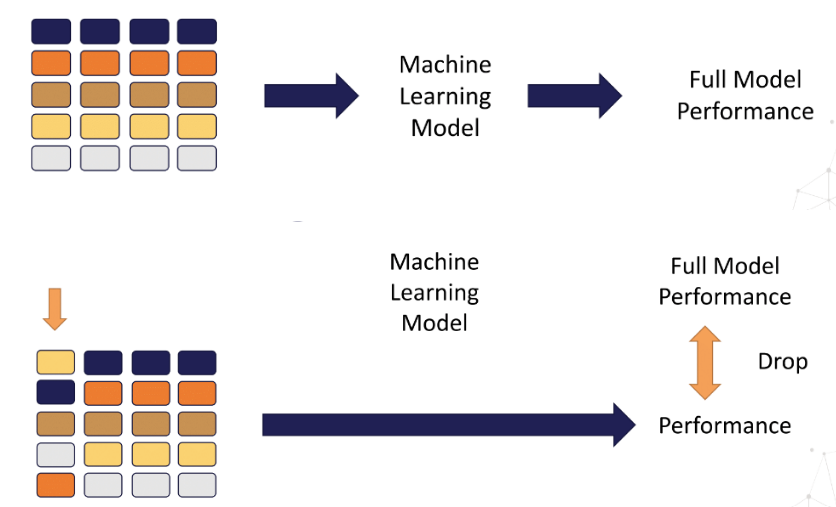

* #### Separa em treino e teste

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

* #### Cria o modelo de rf

In [69]:
rf = RandomForestClassifier(n_estimators=50, max_depth=2, random_state=2909, n_jobs=4)

* #### Aplica o shuffling

#### ⛔ Para o threshold, coloca-se o valor de performance máxima permitida para ficar no dataset. Features com valor acima (maior queda de performance em relação ao threshold) irão ficar no dataset final e valores abaixo (menor queda de performance em relação ao threshold) serão removidos.

In [70]:
sel = SelectByShuffling(
    variables=None, #Examina todas as variáveis numéricas
    estimator=rf, #modelo
    scoring='roc_auc', #score
    threshold=0, #a queda de performance máxima permitida (acima de zero)
    cv=3, # cross validation
    random_state=1 # seed
)

sel.fit(X_train, y_train)

SelectByShuffling(estimator=RandomForestClassifier(max_depth=2, n_estimators=50,
                                                   n_jobs=4,
                                                   random_state=2909),
                  random_state=1, threshold=0)

* #### Performance inicial do modelo

In [71]:
sel.initial_model_performance_

0.6854579498672484

* #### Visualizando a queda de performance por feature

<Axes: >

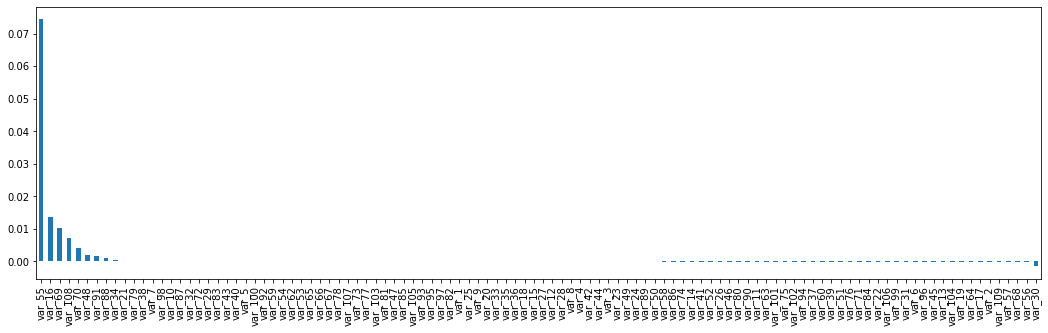

In [72]:
pd.Series(sel.performance_drifts_).sort_values(ascending=False).plot.bar(figsize=(18,5))

`var_55` teve a maior queda de performance, então será mantida

In [73]:
len(sel.features_to_drop_)

101

In [74]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train.shape, X_test.shape

((35000, 7), (15000, 7))

### 6.2) Recursive Feature Elimination

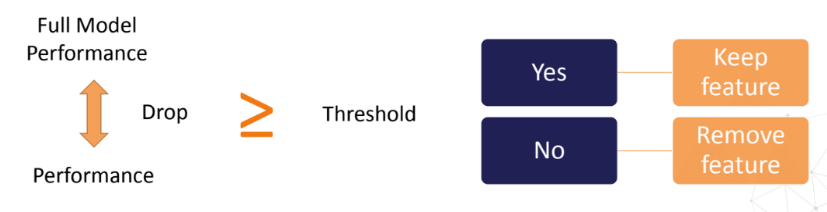

👉 Processo começa treinando um modelo para o dataset completo, remove a features menos importante e treina novamente removendo uma por uma.

👉 Se a feature for importante ela irá impactar muito a avaliação do modelo, ou seja, se a queda de performance for maior ou igual ao valor definido do Threshold: mantenha. Caso contrário não. Repete o processo até encerrar a questão.

* #### Separa em treino e teste

In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    data2.drop(labels=['target'], axis=1),
    data2['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

* #### Remove features constantes e duplicadas

In [76]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
])

pipe.fit(X_train)

# remove features

X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

X_train.shape, X_test.shape

((35000, 108), (15000, 108))

* #### Eliminação recursiva

#### ⛔ Para o threshold, coloca-se o valor de performance máxima permitida para ficar no dataset. Features com valor acima (maior queda de performance em relação ao threshold) irão ficar no dataset final e valores abaixo (menor queda de performance em relação ao threshold) serão removidos.

### 6.3) Recursive Feature Addition

👉 Mesmo procedimento que o 6.2, porém com metodologia ao contrário.

👉 Primeiro cria-se um modelo com todas as features e seleciona as mais importantes.

👉 Depois começa criando um modelo com a feature mais importante e avalia a performance. Adiciona-se mais features, e avalia a métrica.

👉 Se houve um aumento da métrica, então essa feature adicionada deve ser mantida, caso contrário não

* #### Remove features constantes e duplicadas

* #### Adição Recursiva

#### ⛔ AO CONTRÁRIO: Para o threshold, coloca-se o valor de aumento de performance MÍNIMA permitida para ficar no dataset. Features com valor acima (aumento de performance em relação ao threshold) irão ficar no dataset final e valores abaixo (queda de performance em relação ao threshold) serão removidos.